# ***Abstract***

The objective of this lab is to be predict whether an individual is Obese or not using the given dataset found on this page ()

In [35]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


# ***Reading The Dataset***

In [36]:
df = pd.read_csv("bodyfat.csv")
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [38]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [39]:
cat_list = list(df.select_dtypes(include = 'O').columns)
num_list = list(df.select_dtypes(exclude = 'O').columns)
print("All features: ",df.shape[1])
print("Categorical: ",len(cat_list))
print("Numeric: ",len(num_list))

All features:  15
Categorical:  0
Numeric:  15


# ***Exploratory Data Analysis***

count    252.000000
mean      19.150794
std        8.368740
min        0.000000
25%       12.475000
50%       19.200000
75%       25.300000
max       47.500000
Name: BodyFat, dtype: float64


<Axes: xlabel='BodyFat', ylabel='Count'>

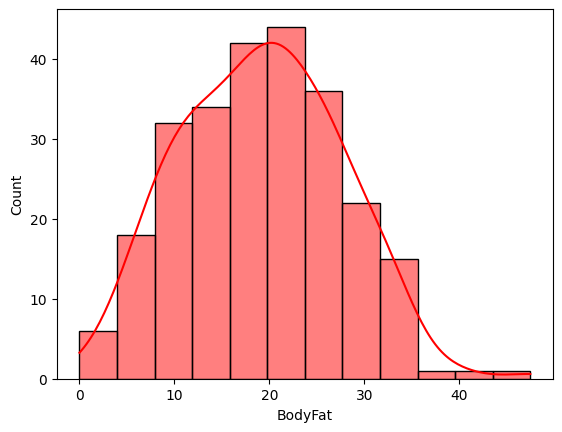

In [40]:
# Distribution of the body fat

print(df['BodyFat'].describe())
sns.histplot(data=df, x=df["BodyFat"], kde=True, color='r')

array([[<Axes: title={'center': 'Density'}>,
        <Axes: title={'center': 'BodyFat'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Neck'}>,
        <Axes: title={'center': 'Chest'}>,
        <Axes: title={'center': 'Abdomen'}>],
       [<Axes: title={'center': 'Hip'}>,
        <Axes: title={'center': 'Thigh'}>,
        <Axes: title={'center': 'Knee'}>,
        <Axes: title={'center': 'Ankle'}>],
       [<Axes: title={'center': 'Biceps'}>,
        <Axes: title={'center': 'Forearm'}>,
        <Axes: title={'center': 'Wrist'}>, <Axes: >]], dtype=object)

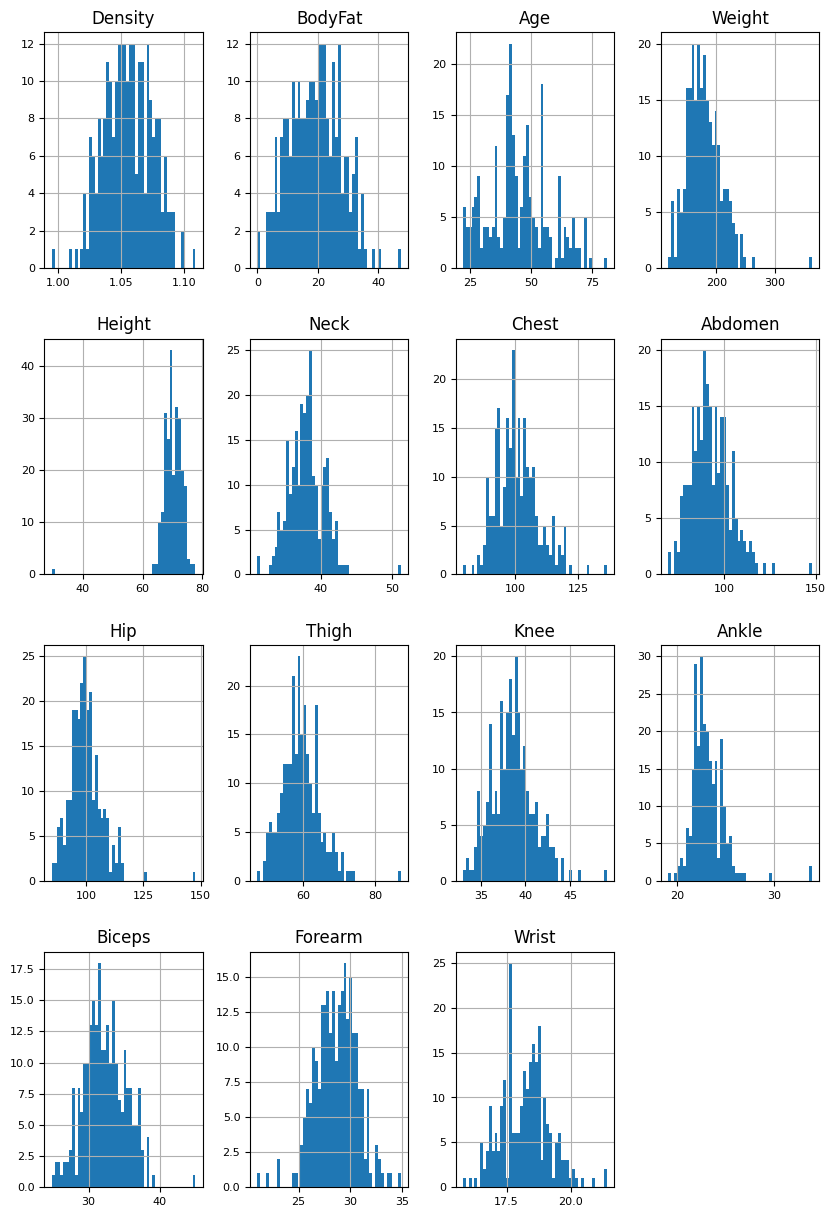

In [41]:
# Distribution of the features

df.hist(figsize=(10, 15), bins=50, xlabelsize=8, ylabelsize=8)

In [42]:
# Finding correlation between Body fat and the features in the dataset

df_corr = df.corr()['BodyFat']
del df_corr["BodyFat"]
good_features = df_corr[df_corr > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with BodyFat:\n{}".format(len(good_features), good_features))

There is 6 strongly correlated values with BodyFat:
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612414
Thigh      0.559608
Knee       0.508665
Name: BodyFat, dtype: float64


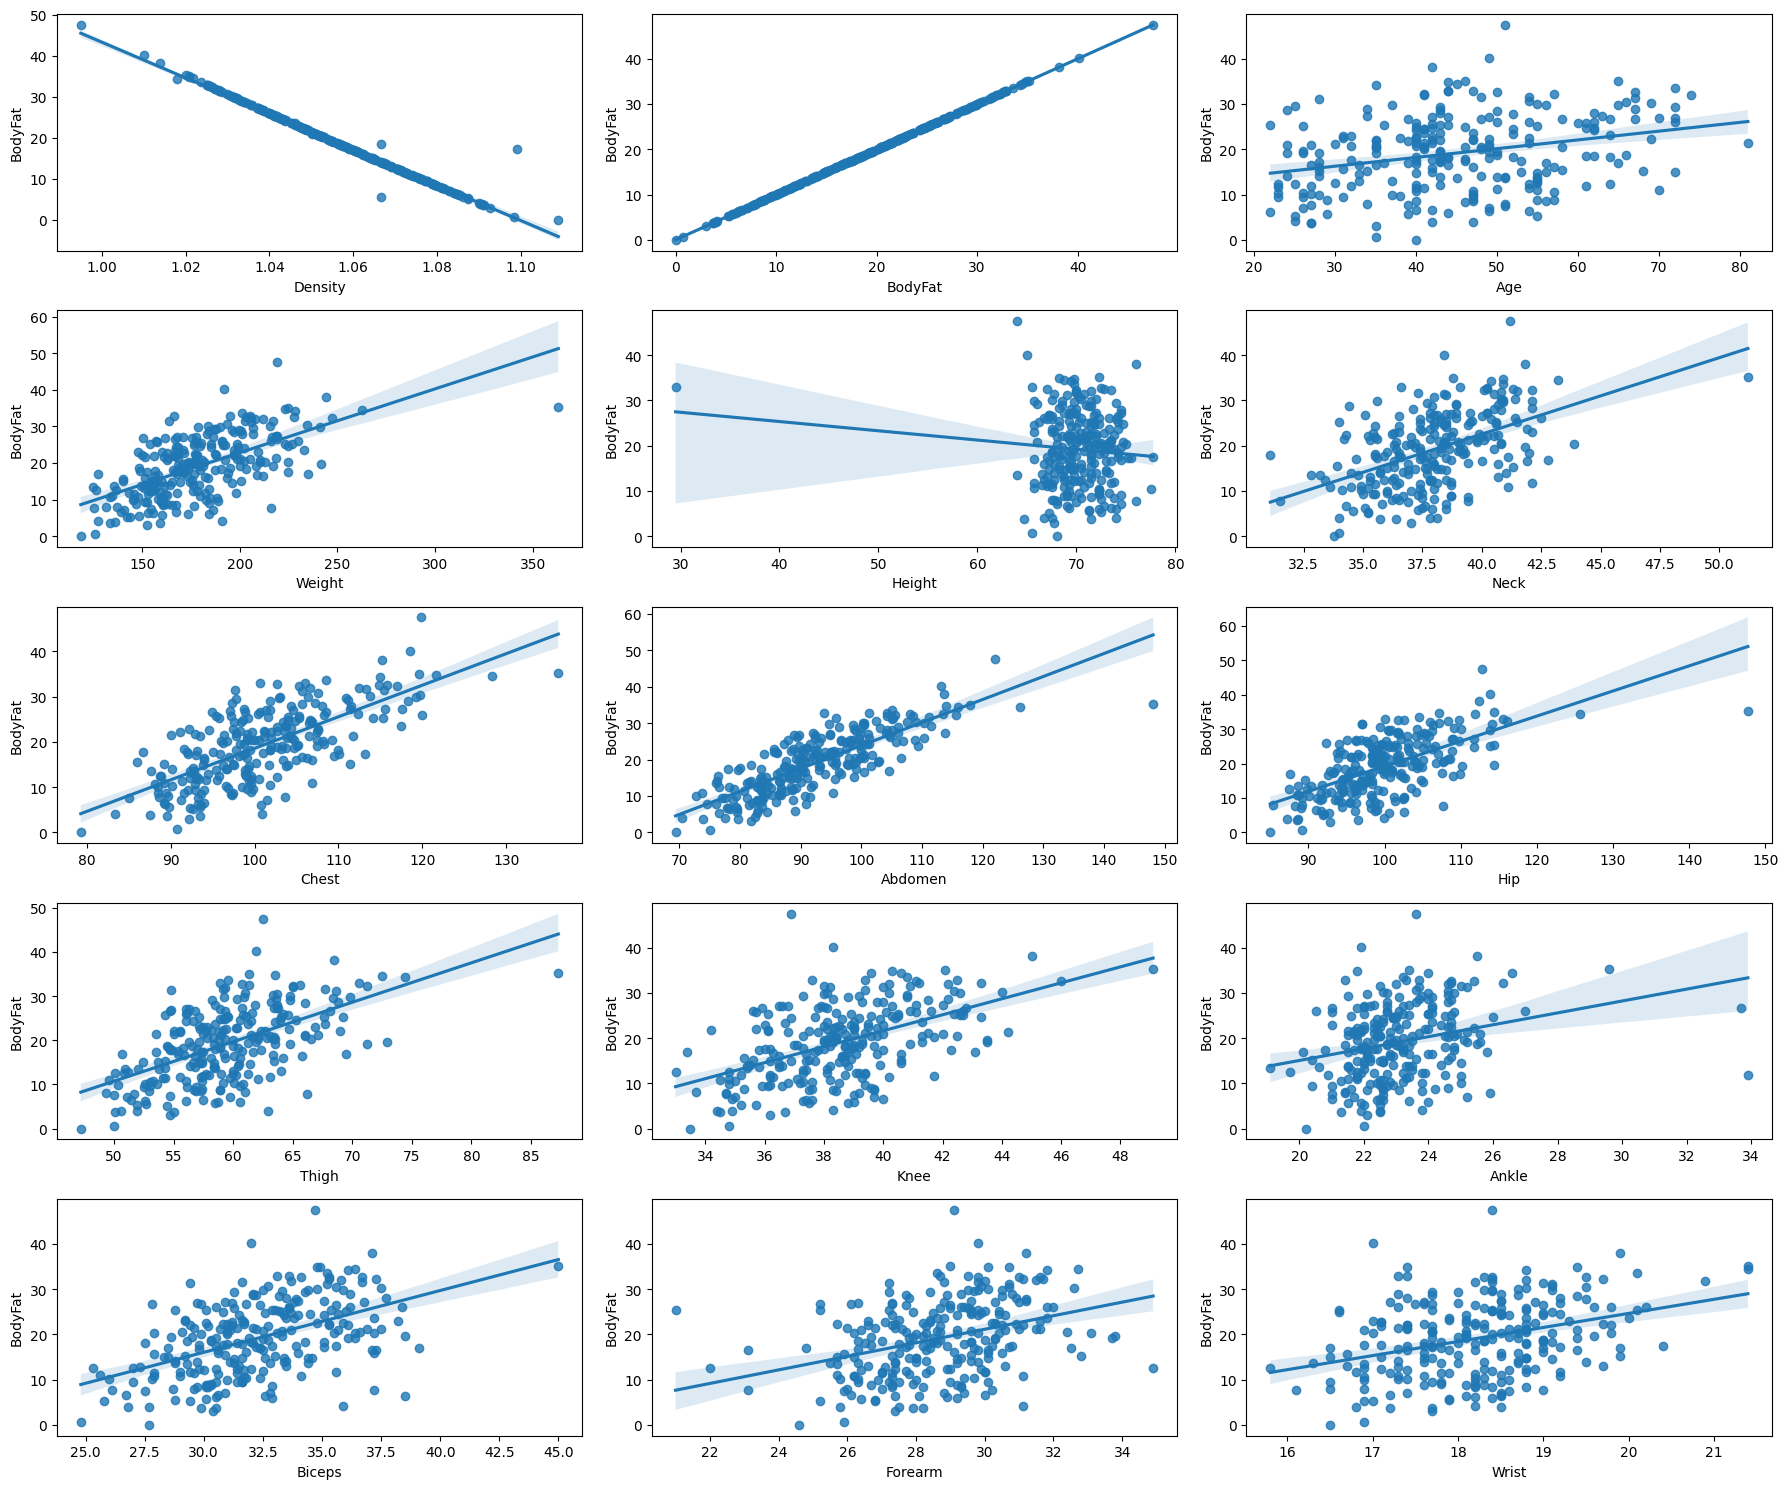

In [43]:
# Plot features and see which ones have very few or explainable outliers 
# Remove the outliers from these features and see which one can have a good correlation without their outliers

fig, axes = plt.subplots(round(len(df.columns) / 3), 3, figsize=(18, 15))

for i, ax in enumerate(axes.flat):
    if i < len(df.columns):
        column_name = df.columns[i]
        sns.regplot(x=column_name, y='BodyFat', data=df, ax=ax)
        ax.set_xlabel(column_name)
        ax.set_ylabel('BodyFat')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [44]:
# Calculate z-scores for each column
z_scores = np.abs((df - df.mean()) / df.std())

# Define a z-score threshold for outlier detection (e.g., 3.0)
z_threshold = 3

# Filter out rows where any column's z-score exceeds the threshold
outliers_removed_df = df[(z_scores < z_threshold).all(axis=1)]

outliers_removed_df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,1.056301,18.820248,44.785124,177.572521,70.337810,37.911157,100.452066,92.016529,99.491322,59.212810,38.528926,22.974380,32.211983,28.680579,18.208264
std,0.018412,8.058765,12.601921,26.064818,2.592338,2.246639,7.805558,9.706193,6.080037,4.778883,2.244234,1.310287,2.886623,1.892372,0.876203
min,1.010100,0.000000,22.000000,118.500000,64.000000,31.100000,79.300000,69.400000,85.000000,47.200000,33.400000,19.100000,24.800000,23.100000,16.100000
25%,1.042400,12.400000,35.250000,158.500000,68.312500,36.400000,94.250000,84.525000,95.500000,56.025000,37.025000,22.000000,30.200000,27.300000,17.600000
50%,1.055050,19.150000,43.000000,176.000000,70.125000,37.950000,99.600000,90.900000,99.250000,58.950000,38.450000,22.750000,31.950000,28.700000,18.300000
75%,1.070475,24.875000,54.000000,195.937500,72.250000,39.400000,105.175000,98.875000,103.075000,62.100000,39.875000,23.900000,34.100000,30.000000,18.800000
max,1.108900,40.100000,81.000000,247.250000,77.750000,43.900000,121.600000,118.000000,116.100000,74.400000,45.000000,27.000000,39.100000,33.800000,20.900000


In [45]:
# Finding more features that correlate to bodyfat after removing the outliers
df_new_corr = outliers_removed_df.corr()['BodyFat']
del df_new_corr["BodyFat"]
new_good_features = df_new_corr[df_new_corr >= 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with BodyFat:\n{}".format(len(new_good_features), new_good_features))

There is 6 strongly correlated values with BodyFat:
Abdomen    0.816194
Chest      0.684386
Hip        0.617246
Weight     0.602304
Thigh      0.541309
Knee       0.505489
Name: BodyFat, dtype: float64


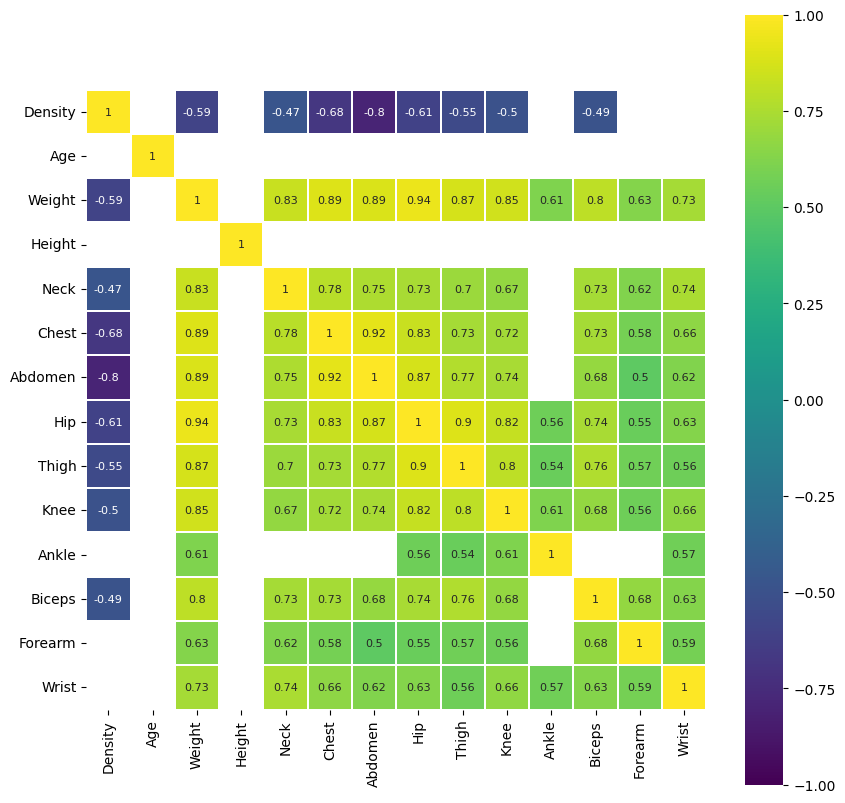

In [46]:
# Feature to feature relationships 

corr = df.drop('BodyFat', axis=1).corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True);

# ***Data Preprocessing***

In [47]:
print("Total null values at each column: \n", df.isnull().sum())

Total null values at each column: 
 Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64


In [48]:
df["Bodyfat_indexed"] = np.where(df["Age"] <= 39,
                                  np.where(df["BodyFat"] > 25, 1, 0),
                                  np.where(df["BodyFat"] > 28, 1, 0))

df = df.drop(columns=["BodyFat"])
df.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Bodyfat_indexed
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,0
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,0
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,1
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,0
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,1


# ***Feature Selection***

In [49]:
X = outliers_removed_df.iloc[:, :14]
y = df.iloc[:, 14]

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(max_iter=1500), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

selected_features = list(X.columns[rfecv.support_])

print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Selected features: {selected_features}")

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()



ValueError: Found input variables with inconsistent numbers of samples: [242, 252]

# ***Creating The Model***

In [ ]:
X_selected = X.iloc[:, rfecv.support_]
y = df.iloc[:, 14]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

model = LogisticRegression(max_iter=1500, random_state=42)
model.fit(X_train_scaled, y_train)




LogisticRegression(max_iter=1500, random_state=42)

In [ ]:
pred = model.predict(X_test_scaled)

# ***Model Evaluation***

# ***Hypertuning***